# 데이터 준비

In [1]:
# 농어의 길이와 무게
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

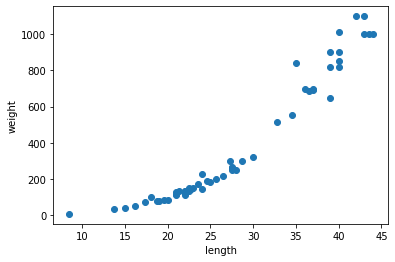

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
# Training set, Test set 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [4]:
# 사이킷런에 사용할 Training set은 2차원 배열이어야 함
# reshape()메서드로 배열의 크기 지정
# 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [6]:
knr.score(test_input, test_target)

0.992809406101064

In [7]:
# 타깃과 예측한 값 사이의 차이를 구해 어느 정도 예측이 벗어났는지 가늠해보기

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [8]:
# Training set의 R^2 점수가 Test Set보다 훨씬 낮은 경우 과소적합, Test Set이 낮은 경우는 과대적합
print(knr.score(train_input, train_target))

0.9698823289099254


In [9]:
# 과소적합을 해결하기 위해선 모델을 더 복잡하게 만들어 줌
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [10]:
print(knr.score(test_input, test_target))

0.9746459963987609
